In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [108]:
train=pd.read_csv('train.csv')
train.head()

,Unnamed: 0,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AuthDate,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,AGG_CREDIT-LIMIT/SANC AMT_mean,AGG_DISBURSED-AMT/HIGH CREDIT_mean,AGG_INSTALLMENT-AMT_mean,AGG_CURRENT-BAL_mean,AGG_OVERDUE-AMT_mean,AGG_WRITE-OFF-AMT_mean,AGG_TENURE_mean,Top-up Month
0,0,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,275000.0,24000.0,2012-02-10,2016-01-15,2012-02-10,4022465,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,5555.555556,2.445947e+05,1037.666667,68725.111111,4208.111111,0.0,13.333333,> 48 Months
1,1,2,Monthly,Advance,Closed,PDC,333,BHOPAL,47,485000,350000.0,350000.0,10500.0,2012-03-31,2016-02-15,2012-03-31,4681175,1062,34802,70.00,M,23.0,666.67,SEHORE,MADHYA PRADESH,466001.0,0.000000,1.393622e+06,13404.846154,796112.076923,0.000000,0.0,43.461538,No Top-up Service
2,2,3,Quatrly,Arrear,Active,Direct Debit,1,NaN,68,690000,519728.0,519728.0,38300.0,2017-06-17,2023-02-10,2017-06-17,25328146,1060,127335,69.77,M,39.0,45257.00,BHOPAL,MADHYA PRADESH,462030.0,3290.322581,1.196248e+05,3078.580645,66618.225806,3338.387097,0.0,14.645161,12-18 Months
3,3,7,Monthly,Advance,Closed,Billed,125,GUNA,48,480000,400000.0,400000.0,11600.0,2013-11-29,2017-11-10,2013-11-29,13021591,1060,25094,80.92,M,24.0,20833.33,ASHOK NAGAR,MADHYA PRADESH,473335.0,0.000000,3.181382e+05,1392.750000,156000.000000,0.000000,0.0,8.250000,> 48 Months
4,4,8,Monthly,Arrear,Closed,Billed,152,BILASPUR,44,619265,440000.0,440000.0,15000.0,2011-12-08,2015-07-05,2011-12-08,3291320,1046,21853,71.05,M,56.0,27313.67,BILASPUR,CHATTISGARH,495442.0,0.000000,2.893166e+05,1248.285714,139159.857143,5026.428571,0.0,33.714286,36-48 Months


In [109]:
train.shape

(128655, 34)

In [110]:
train.isnull().sum()

Unnamed: 0                                0
ID                                        0
Frequency                                 0
InstlmentMode                             0
LoanStatus                                0
PaymentMode                               0
BranchID                                  0
Area                                  11653
Tenure                                    0
AssetCost                                 0
AmountFinance                             0
DisbursalAmount                           0
EMI                                       0
DisbursalDate                             0
MaturityDAte                              1
AuthDate                                  0
AssetID                                   0
ManufacturerID                            0
SupplierID                                0
LTV                                       0
SEX                                      59
AGE                                      59
MonthlyIncome                   

In [111]:
train['Top-up Month'].unique()

array([' > 48 Months', 'No Top-up Service', '12-18 Months',
       '36-48 Months', '18-24 Months', '24-30 Months', '30-36 Months'],
      dtype=object)

##THIS IS A MULTICLASS PROBLEM STATEMENT. SO WE ARE GOING TO CONVERT THIS INTO LABEL FORM.

In [112]:
train['Top-up Month'].value_counts()

No Top-up Service    106677
 > 48 Months           8366
36-48 Months           3656
24-30 Months           3492
30-36 Months           3062
18-24 Months           2368
12-18 Months           1034
Name: Top-up Month, dtype: int64

In [113]:
label=train['Top-up Month'].value_counts().to_dict()
label={k:i for i,k in enumerate(label,0)}
label

{' > 48 Months': 1,
 '12-18 Months': 6,
 '18-24 Months': 5,
 '24-30 Months': 3,
 '30-36 Months': 4,
 '36-48 Months': 2,
 'No Top-up Service': 0}

In [114]:
train['Top-up Month']=train['Top-up Month'].map(label)
train.head()

,Unnamed: 0,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AuthDate,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,AGG_CREDIT-LIMIT/SANC AMT_mean,AGG_DISBURSED-AMT/HIGH CREDIT_mean,AGG_INSTALLMENT-AMT_mean,AGG_CURRENT-BAL_mean,AGG_OVERDUE-AMT_mean,AGG_WRITE-OFF-AMT_mean,AGG_TENURE_mean,Top-up Month
0,0,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,275000.0,24000.0,2012-02-10,2016-01-15,2012-02-10,4022465,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,5555.555556,2.445947e+05,1037.666667,68725.111111,4208.111111,0.0,13.333333,1
1,1,2,Monthly,Advance,Closed,PDC,333,BHOPAL,47,485000,350000.0,350000.0,10500.0,2012-03-31,2016-02-15,2012-03-31,4681175,1062,34802,70.00,M,23.0,666.67,SEHORE,MADHYA PRADESH,466001.0,0.000000,1.393622e+06,13404.846154,796112.076923,0.000000,0.0,43.461538,0
2,2,3,Quatrly,Arrear,Active,Direct Debit,1,NaN,68,690000,519728.0,519728.0,38300.0,2017-06-17,2023-02-10,2017-06-17,25328146,1060,127335,69.77,M,39.0,45257.00,BHOPAL,MADHYA PRADESH,462030.0,3290.322581,1.196248e+05,3078.580645,66618.225806,3338.387097,0.0,14.645161,6
3,3,7,Monthly,Advance,Closed,Billed,125,GUNA,48,480000,400000.0,400000.0,11600.0,2013-11-29,2017-11-10,2013-11-29,13021591,1060,25094,80.92,M,24.0,20833.33,ASHOK NAGAR,MADHYA PRADESH,473335.0,0.000000,3.181382e+05,1392.750000,156000.000000,0.000000,0.0,8.250000,1
4,4,8,Monthly,Arrear,Closed,Billed,152,BILASPUR,44,619265,440000.0,440000.0,15000.0,2011-12-08,2015-07-05,2011-12-08,3291320,1046,21853,71.05,M,56.0,27313.67,BILASPUR,CHATTISGARH,495442.0,0.000000,2.893166e+05,1248.285714,139159.857143,5026.428571,0.0,33.714286,2


## HANDLING MISSING VALUES

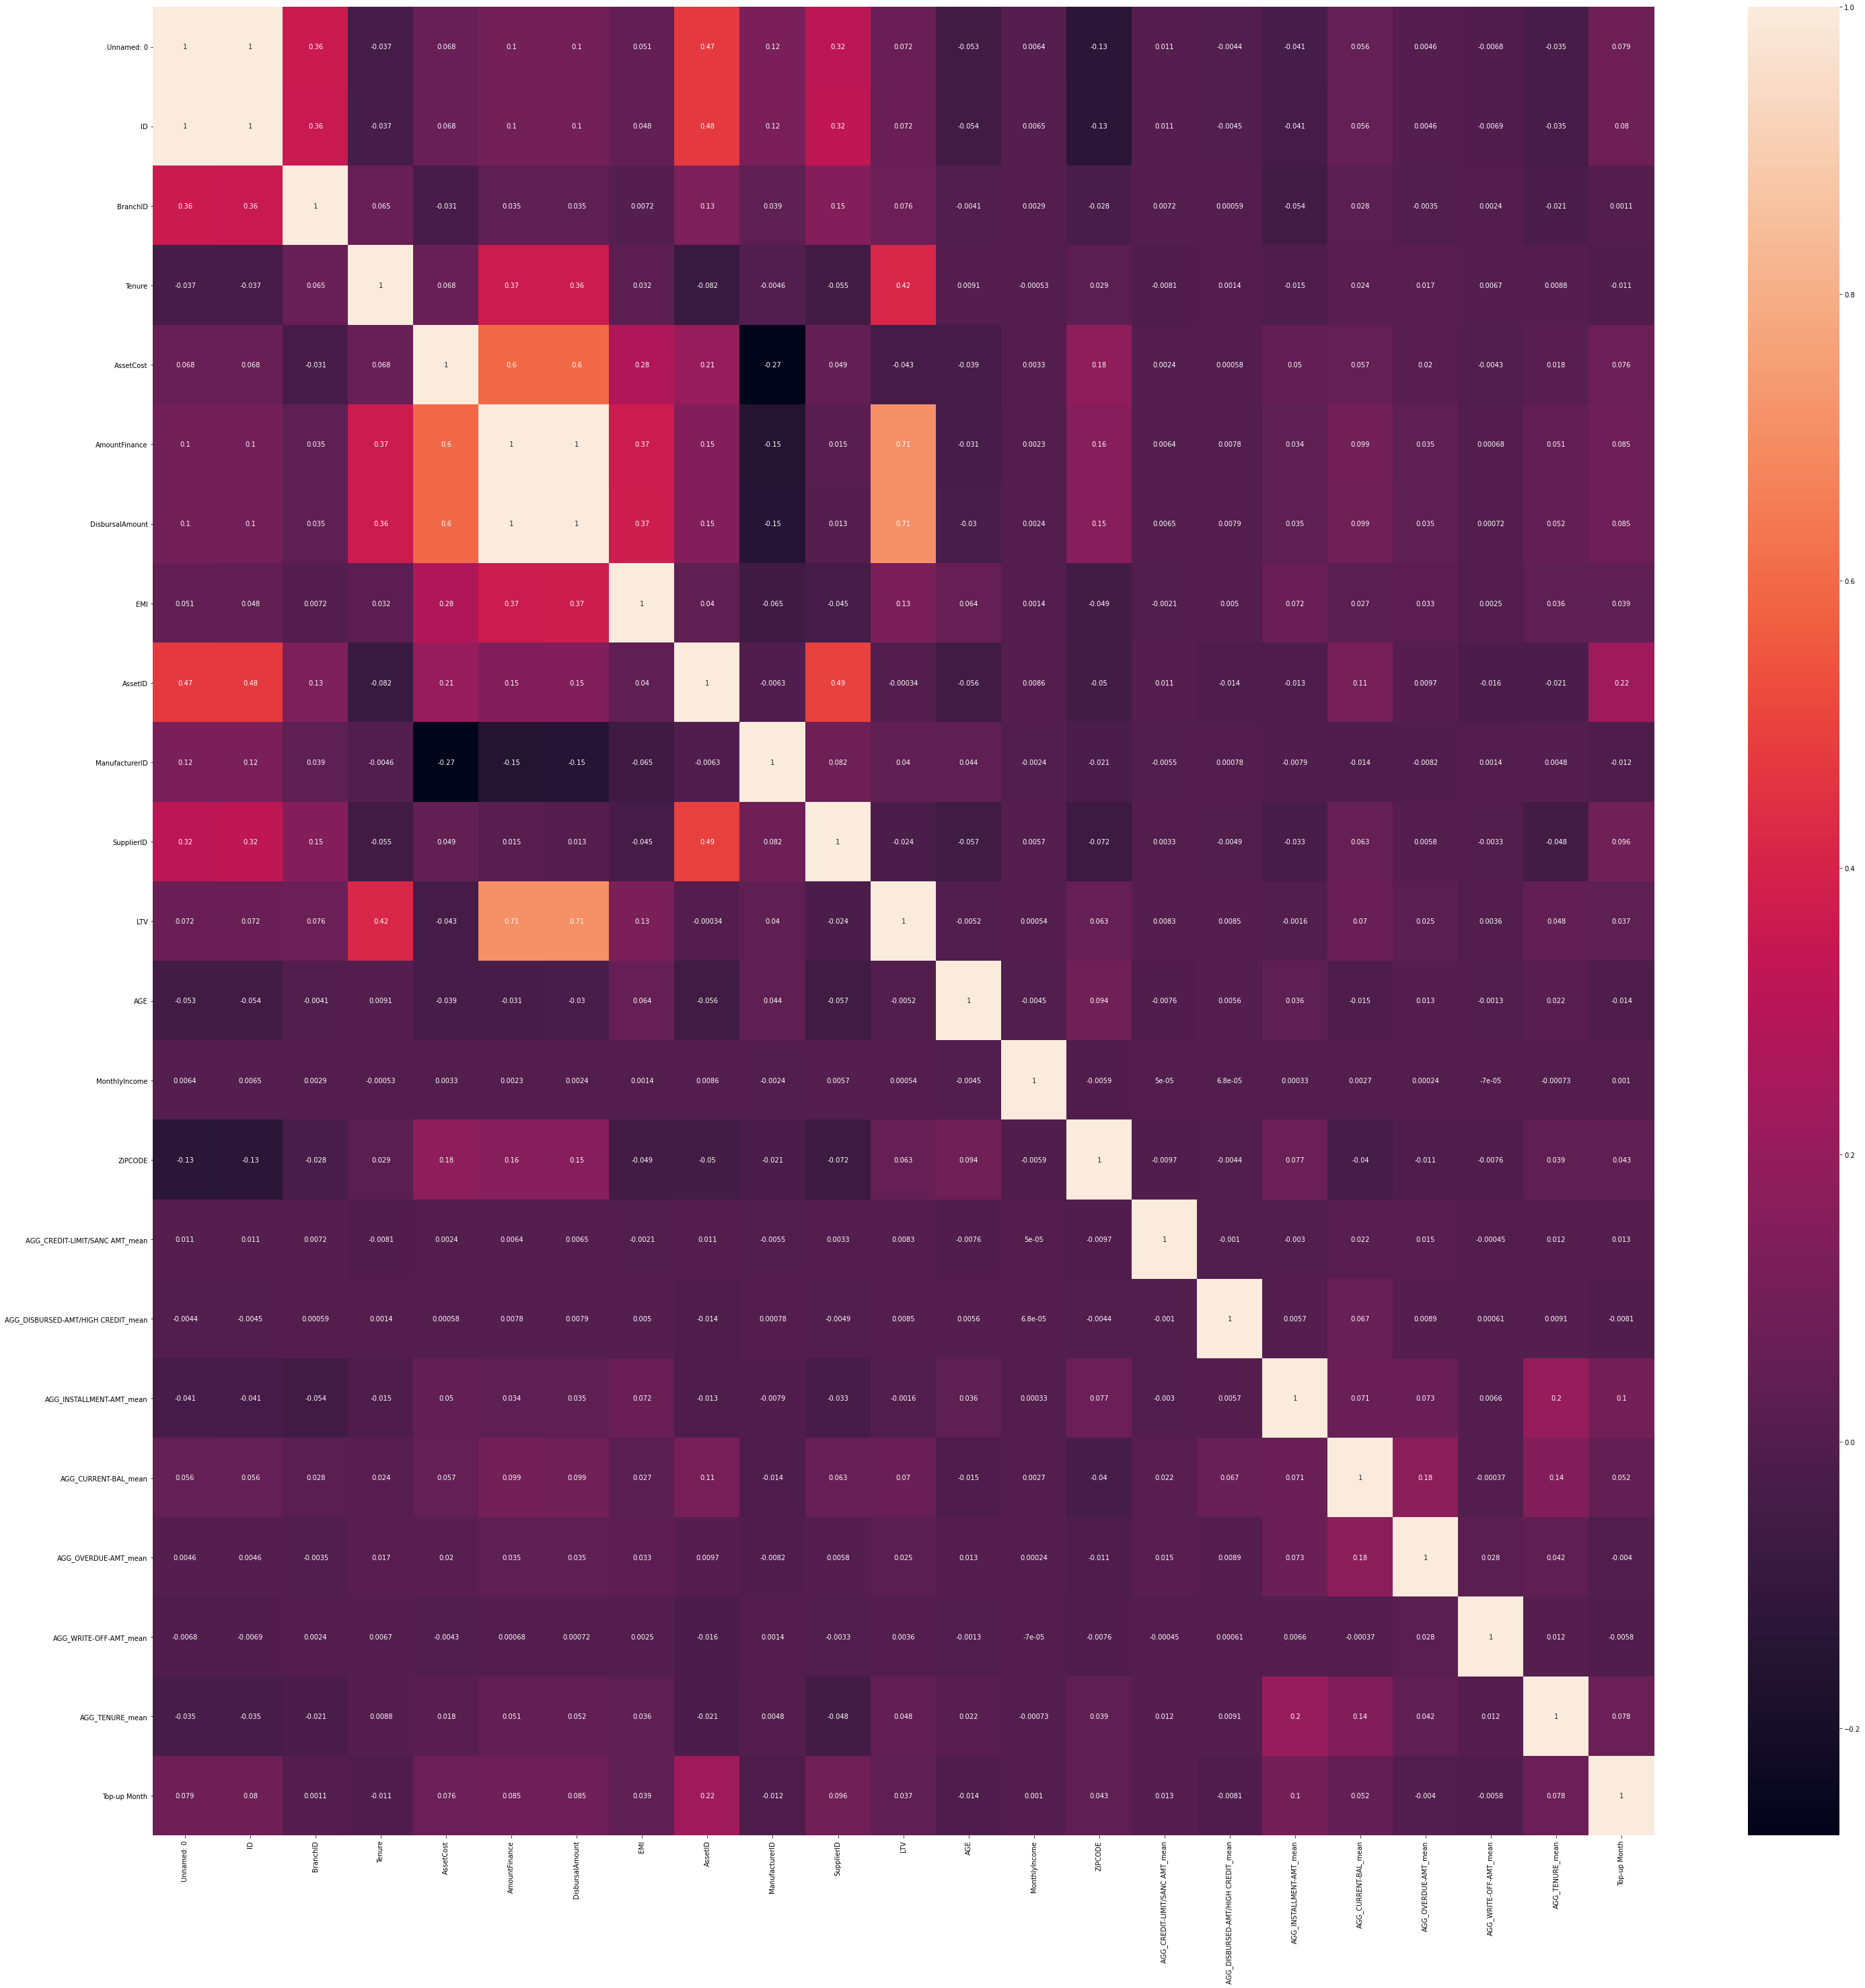

In [115]:
corr=train.corr()
plt.figure(figsize=(50,50))
sns.heatmap(corr,annot=True)

In [116]:
train.head()

,Unnamed: 0,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AuthDate,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,AGG_CREDIT-LIMIT/SANC AMT_mean,AGG_DISBURSED-AMT/HIGH CREDIT_mean,AGG_INSTALLMENT-AMT_mean,AGG_CURRENT-BAL_mean,AGG_OVERDUE-AMT_mean,AGG_WRITE-OFF-AMT_mean,AGG_TENURE_mean,Top-up Month
0,0,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,275000.0,24000.0,2012-02-10,2016-01-15,2012-02-10,4022465,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,5555.555556,2.445947e+05,1037.666667,68725.111111,4208.111111,0.0,13.333333,1
1,1,2,Monthly,Advance,Closed,PDC,333,BHOPAL,47,485000,350000.0,350000.0,10500.0,2012-03-31,2016-02-15,2012-03-31,4681175,1062,34802,70.00,M,23.0,666.67,SEHORE,MADHYA PRADESH,466001.0,0.000000,1.393622e+06,13404.846154,796112.076923,0.000000,0.0,43.461538,0
2,2,3,Quatrly,Arrear,Active,Direct Debit,1,NaN,68,690000,519728.0,519728.0,38300.0,2017-06-17,2023-02-10,2017-06-17,25328146,1060,127335,69.77,M,39.0,45257.00,BHOPAL,MADHYA PRADESH,462030.0,3290.322581,1.196248e+05,3078.580645,66618.225806,3338.387097,0.0,14.645161,6
3,3,7,Monthly,Advance,Closed,Billed,125,GUNA,48,480000,400000.0,400000.0,11600.0,2013-11-29,2017-11-10,2013-11-29,13021591,1060,25094,80.92,M,24.0,20833.33,ASHOK NAGAR,MADHYA PRADESH,473335.0,0.000000,3.181382e+05,1392.750000,156000.000000,0.000000,0.0,8.250000,1
4,4,8,Monthly,Arrear,Closed,Billed,152,BILASPUR,44,619265,440000.0,440000.0,15000.0,2011-12-08,2015-07-05,2011-12-08,3291320,1046,21853,71.05,M,56.0,27313.67,BILASPUR,CHATTISGARH,495442.0,0.000000,2.893166e+05,1248.285714,139159.857143,5026.428571,0.0,33.714286,2


In [117]:
train['Area'].value_counts()

LUCKNOW                         9337
SIRSA                           6575
NELLORE                         5859
KANPUR                          4573
INDORE                          4024
MIRYALGUDA                      3978
JAIPUR                          3724
SINDHANUR                       3719
AHMEDABAD AMBAVADI              3654
JABALPUR                        3534
VIJAYAWADA                      3443
MANDSAUR                        3384
BARODA                          3087
HUBLI                           3026
BURDWAN                         2990
KARIMNAGAR                      2809
PATNA                           2610
VIDISHA                         2602
BHUBANESHWAR                    2311
RAIPUR                          2278
GULBARGA                        2179
BHOPAL                          2032
BIKANER                         1909
JALANDHAR                       1851
HOSHANGABAD                     1802
NIZAMABAD                       1743
VISHAKHAPATNAM                  1743
N

In [118]:
train['MaturityDAte'].value_counts()

2018-06-10    2298
2017-06-10    2217
2019-06-10    2195
2017-12-10    2185
2021-06-10    2180
              ... 
2015-02-18       1
2011-06-20       1
2011-08-06       1
2025-03-10       1
2015-05-12       1
Name: MaturityDAte, Length: 980, dtype: int64

In [119]:
train['SEX'].value_counts()

M    122144
F      6452
Name: SEX, dtype: int64

In [120]:
col = ['AGE', 'MonthlyIncome']

In [121]:
def impute_nan(train, feat):
    m=train[feat].median()
    train[feat]=train[feat].fillna(m)

for i in col:
    impute_nan(train, i)

In [122]:
train.head()

,Unnamed: 0,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AuthDate,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,AGG_CREDIT-LIMIT/SANC AMT_mean,AGG_DISBURSED-AMT/HIGH CREDIT_mean,AGG_INSTALLMENT-AMT_mean,AGG_CURRENT-BAL_mean,AGG_OVERDUE-AMT_mean,AGG_WRITE-OFF-AMT_mean,AGG_TENURE_mean,Top-up Month
0,0,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,275000.0,24000.0,2012-02-10,2016-01-15,2012-02-10,4022465,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,5555.555556,2.445947e+05,1037.666667,68725.111111,4208.111111,0.0,13.333333,1
1,1,2,Monthly,Advance,Closed,PDC,333,BHOPAL,47,485000,350000.0,350000.0,10500.0,2012-03-31,2016-02-15,2012-03-31,4681175,1062,34802,70.00,M,23.0,666.67,SEHORE,MADHYA PRADESH,466001.0,0.000000,1.393622e+06,13404.846154,796112.076923,0.000000,0.0,43.461538,0
2,2,3,Quatrly,Arrear,Active,Direct Debit,1,NaN,68,690000,519728.0,519728.0,38300.0,2017-06-17,2023-02-10,2017-06-17,25328146,1060,127335,69.77,M,39.0,45257.00,BHOPAL,MADHYA PRADESH,462030.0,3290.322581,1.196248e+05,3078.580645,66618.225806,3338.387097,0.0,14.645161,6
3,3,7,Monthly,Advance,Closed,Billed,125,GUNA,48,480000,400000.0,400000.0,11600.0,2013-11-29,2017-11-10,2013-11-29,13021591,1060,25094,80.92,M,24.0,20833.33,ASHOK NAGAR,MADHYA PRADESH,473335.0,0.000000,3.181382e+05,1392.750000,156000.000000,0.000000,0.0,8.250000,1
4,4,8,Monthly,Arrear,Closed,Billed,152,BILASPUR,44,619265,440000.0,440000.0,15000.0,2011-12-08,2015-07-05,2011-12-08,3291320,1046,21853,71.05,M,56.0,27313.67,BILASPUR,CHATTISGARH,495442.0,0.000000,2.893166e+05,1248.285714,139159.857143,5026.428571,0.0,33.714286,2


In [123]:
train['Area'] = train['Area'].fillna('Other')
train['SEX'] = train['SEX'].fillna('M')
train['City'] = train['City'].fillna('Other')
train['MaturityDAte'] = train['MaturityDAte'].fillna('2018-06-10')

In [124]:
train.head()

,Unnamed: 0,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AuthDate,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,AGG_CREDIT-LIMIT/SANC AMT_mean,AGG_DISBURSED-AMT/HIGH CREDIT_mean,AGG_INSTALLMENT-AMT_mean,AGG_CURRENT-BAL_mean,AGG_OVERDUE-AMT_mean,AGG_WRITE-OFF-AMT_mean,AGG_TENURE_mean,Top-up Month
0,0,1,Monthly,Arrear,Closed,PDC_E,1,Other,48,450000,275000.0,275000.0,24000.0,2012-02-10,2016-01-15,2012-02-10,4022465,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,5555.555556,2.445947e+05,1037.666667,68725.111111,4208.111111,0.0,13.333333,1
1,1,2,Monthly,Advance,Closed,PDC,333,BHOPAL,47,485000,350000.0,350000.0,10500.0,2012-03-31,2016-02-15,2012-03-31,4681175,1062,34802,70.00,M,23.0,666.67,SEHORE,MADHYA PRADESH,466001.0,0.000000,1.393622e+06,13404.846154,796112.076923,0.000000,0.0,43.461538,0
2,2,3,Quatrly,Arrear,Active,Direct Debit,1,Other,68,690000,519728.0,519728.0,38300.0,2017-06-17,2023-02-10,2017-06-17,25328146,1060,127335,69.77,M,39.0,45257.00,BHOPAL,MADHYA PRADESH,462030.0,3290.322581,1.196248e+05,3078.580645,66618.225806,3338.387097,0.0,14.645161,6
3,3,7,Monthly,Advance,Closed,Billed,125,GUNA,48,480000,400000.0,400000.0,11600.0,2013-11-29,2017-11-10,2013-11-29,13021591,1060,25094,80.92,M,24.0,20833.33,ASHOK NAGAR,MADHYA PRADESH,473335.0,0.000000,3.181382e+05,1392.750000,156000.000000,0.000000,0.0,8.250000,1
4,4,8,Monthly,Arrear,Closed,Billed,152,BILASPUR,44,619265,440000.0,440000.0,15000.0,2011-12-08,2015-07-05,2011-12-08,3291320,1046,21853,71.05,M,56.0,27313.67,BILASPUR,CHATTISGARH,495442.0,0.000000,2.893166e+05,1248.285714,139159.857143,5026.428571,0.0,33.714286,2


In [125]:
train.isnull().sum()

Unnamed: 0                              0
ID                                      0
Frequency                               0
InstlmentMode                           0
LoanStatus                              0
PaymentMode                             0
BranchID                                0
Area                                    0
Tenure                                  0
AssetCost                               0
AmountFinance                           0
DisbursalAmount                         0
EMI                                     0
DisbursalDate                           0
MaturityDAte                            0
AuthDate                                0
AssetID                                 0
ManufacturerID                          0
SupplierID                              0
LTV                                     0
SEX                                     0
AGE                                     0
MonthlyIncome                           0
City                              

In [126]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128655 entries, 0 to 128654
Data columns (total 34 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Unnamed: 0                          128655 non-null  int64  
 1   ID                                  128655 non-null  int64  
 2   Frequency                           128655 non-null  object 
 3   InstlmentMode                       128655 non-null  object 
 4   LoanStatus                          128655 non-null  object 
 5   PaymentMode                         128655 non-null  object 
 6   BranchID                            128655 non-null  int64  
 7   Area                                128655 non-null  object 
 8   Tenure                              128655 non-null  int64  
 9   AssetCost                           128655 non-null  int64  
 10  AmountFinance                       128655 non-null  float64
 11  DisbursalAmount           

In [127]:
import datetime as dt
train[["MaturityDAte", "DisbursalDate", "AuthDate"]] = train[["MaturityDAte", "DisbursalDate", "AuthDate"]].apply(pd.to_datetime)

In [128]:
train['Difference'] = (train['MaturityDAte']-train['DisbursalDate']).dt.days
train.head()

,Unnamed: 0,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AuthDate,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,AGG_CREDIT-LIMIT/SANC AMT_mean,AGG_DISBURSED-AMT/HIGH CREDIT_mean,AGG_INSTALLMENT-AMT_mean,AGG_CURRENT-BAL_mean,AGG_OVERDUE-AMT_mean,AGG_WRITE-OFF-AMT_mean,AGG_TENURE_mean,Top-up Month,Difference
0,0,1,Monthly,Arrear,Closed,PDC_E,1,Other,48,450000,275000.0,275000.0,24000.0,2012-02-10,2016-01-15,2012-02-10,4022465,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,5555.555556,2.445947e+05,1037.666667,68725.111111,4208.111111,0.0,13.333333,1,1435
1,1,2,Monthly,Advance,Closed,PDC,333,BHOPAL,47,485000,350000.0,350000.0,10500.0,2012-03-31,2016-02-15,2012-03-31,4681175,1062,34802,70.00,M,23.0,666.67,SEHORE,MADHYA PRADESH,466001.0,0.000000,1.393622e+06,13404.846154,796112.076923,0.000000,0.0,43.461538,0,1416
2,2,3,Quatrly,Arrear,Active,Direct Debit,1,Other,68,690000,519728.0,519728.0,38300.0,2017-06-17,2023-02-10,2017-06-17,25328146,1060,127335,69.77,M,39.0,45257.00,BHOPAL,MADHYA PRADESH,462030.0,3290.322581,1.196248e+05,3078.580645,66618.225806,3338.387097,0.0,14.645161,6,2064
3,3,7,Monthly,Advance,Closed,Billed,125,GUNA,48,480000,400000.0,400000.0,11600.0,2013-11-29,2017-11-10,2013-11-29,13021591,1060,25094,80.92,M,24.0,20833.33,ASHOK NAGAR,MADHYA PRADESH,473335.0,0.000000,3.181382e+05,1392.750000,156000.000000,0.000000,0.0,8.250000,1,1442
4,4,8,Monthly,Arrear,Closed,Billed,152,BILASPUR,44,619265,440000.0,440000.0,15000.0,2011-12-08,2015-07-05,2011-12-08,3291320,1046,21853,71.05,M,56.0,27313.67,BILASPUR,CHATTISGARH,495442.0,0.000000,2.893166e+05,1248.285714,139159.857143,5026.428571,0.0,33.714286,2,1305


In [129]:
train.drop(['Unnamed: 0', 'BranchID', 'DisbursalDate', 'PaymentMode', 'MaturityDAte', 'AuthDate', 'AssetID', 'ManufacturerID', 'SupplierID', 'ZiPCODE', 'City'], axis=1, inplace=True)
train.head()

,ID,Frequency,InstlmentMode,LoanStatus,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,LTV,SEX,AGE,MonthlyIncome,State,AGG_CREDIT-LIMIT/SANC AMT_mean,AGG_DISBURSED-AMT/HIGH CREDIT_mean,AGG_INSTALLMENT-AMT_mean,AGG_CURRENT-BAL_mean,AGG_OVERDUE-AMT_mean,AGG_WRITE-OFF-AMT_mean,AGG_TENURE_mean,Top-up Month,Difference
0,1,Monthly,Arrear,Closed,Other,48,450000,275000.0,275000.0,24000.0,61.11,M,49.0,35833.33,MADHYA PRADESH,5555.555556,2.445947e+05,1037.666667,68725.111111,4208.111111,0.0,13.333333,1,1435
1,2,Monthly,Advance,Closed,BHOPAL,47,485000,350000.0,350000.0,10500.0,70.00,M,23.0,666.67,MADHYA PRADESH,0.000000,1.393622e+06,13404.846154,796112.076923,0.000000,0.0,43.461538,0,1416
2,3,Quatrly,Arrear,Active,Other,68,690000,519728.0,519728.0,38300.0,69.77,M,39.0,45257.00,MADHYA PRADESH,3290.322581,1.196248e+05,3078.580645,66618.225806,3338.387097,0.0,14.645161,6,2064
3,7,Monthly,Advance,Closed,GUNA,48,480000,400000.0,400000.0,11600.0,80.92,M,24.0,20833.33,MADHYA PRADESH,0.000000,3.181382e+05,1392.750000,156000.000000,0.000000,0.0,8.250000,1,1442
4,8,Monthly,Arrear,Closed,BILASPUR,44,619265,440000.0,440000.0,15000.0,71.05,M,56.0,27313.67,CHATTISGARH,0.000000,2.893166e+05,1248.285714,139159.857143,5026.428571,0.0,33.714286,2,1305


In [130]:
train['Frequency'].unique()

array(['Monthly', 'Quatrly', 'Half Yearly', 'BI-Monthly'], dtype=object)

In [131]:
train['InstlmentMode'].unique()

array(['Arrear', 'Advance'], dtype=object)

In [132]:
train['LoanStatus'].unique()

array(['Closed', 'Active'], dtype=object)

In [133]:
train['SEX'].unique()

array(['M', 'F'], dtype=object)

In [134]:
train['Area'].unique()

array(['Other', 'BHOPAL', 'GUNA', 'BILASPUR', 'RAIPUR', 'BHUBANESHWAR',
       'CUTTACK', 'BURDWAN', 'DURGAPUR', 'SILIGURI', 'UDAIPUR',
       'CHANDIGARH', 'LUDHIANA   RANI JHANSI ROAD', 'JAIPUR', 'JALANDHAR',
       'KANPUR', 'LUCKNOW', 'KARNAL', 'BANGALORE LALBAGH', 'NELLORE',
       'HUBLI', 'HYDERABAD BEGUMPET', 'KARIMNAGAR', 'MANGALORE', 'MYSORE',
       'MIRYALGUDA', 'NIZAMABAD', 'SINDHANUR', 'VIJAYAWADA',
       'VISHAKHAPATNAM', 'AHMEDABAD AMBAVADI', 'BARODA', 'GANDHIDHAM',
       'LATUR', 'NAGPUR', 'NASHIK', 'PARBHANI', 'AHMEDNAGAR', 'RAJKOT',
       'RAJAHMUNDRY', 'AURANGABAD', 'LUDHIANA FEROZ GANDHI MARKET',
       'NEW DELHI BARAKHAMBHA ROAD', 'INDORE', 'MANDSAUR', 'JABALPUR',
       'AKOLA', 'AMRAVATI', 'SIRSA', 'GULBARGA', 'HOSHANGABAD', 'KOTA',
       'KOLHAPUR', 'SIWAN', 'PATNA', 'BIKANER', 'VIDISHA', 'GUWAHATI',
       'JAMSHEDPUR', 'JHANSI', 'SOLAPUR', 'PUNE APTE ROAD', 'TUMKUR',
       'TADEPALLIGUDEM', 'MEHBOOBNAGAR', 'ANANTAPUR', 'BALASORE',
       'SAHARSA', 'BAN

In [135]:
train['State'].unique()

array(['MADHYA PRADESH', 'CHATTISGARH', 'ORISSA', 'BIHAR', 'WEST BENGAL',
       'RAJASTHAN', 'HARYANA', 'PUNJAB', 'HIMACHAL PRADESH',
       'UTTAR PRADESH', 'UTTARAKHAND', 'KARNATAKA', 'ANDHRA PRADESH',
       'TELANGANA', 'GUJARAT', 'MAHARASHTRA', 'DELHI', 'ASSAM',
       'JHARKHAND', 'TAMIL NADU', 'DADRA AND NAGAR HAVELI', 'CHANDIGARH'],
      dtype=object)

In [136]:
col = ['InstlmentMode', 'LoanStatus', 'Frequency', 'State', 'Area', 'SEX']

In [137]:
for feature in col:
    labels_ordered=train[feature].value_counts().to_dict()
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    train[feature]=train[feature].map(labels_ordered)
train.head()

,ID,Frequency,InstlmentMode,LoanStatus,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,LTV,SEX,AGE,MonthlyIncome,State,AGG_CREDIT-LIMIT/SANC AMT_mean,AGG_DISBURSED-AMT/HIGH CREDIT_mean,AGG_INSTALLMENT-AMT_mean,AGG_CURRENT-BAL_mean,AGG_OVERDUE-AMT_mean,AGG_WRITE-OFF-AMT_mean,AGG_TENURE_mean,Top-up Month,Difference
0,1,1,0,0,0,48,450000,275000.0,275000.0,24000.0,61.11,0,49.0,35833.33,0,5555.555556,2.445947e+05,1037.666667,68725.111111,4208.111111,0.0,13.333333,1,1435
1,2,1,1,0,22,47,485000,350000.0,350000.0,10500.0,70.00,0,23.0,666.67,0,0.000000,1.393622e+06,13404.846154,796112.076923,0.000000,0.0,43.461538,0,1416
2,3,2,0,1,0,68,690000,519728.0,519728.0,38300.0,69.77,0,39.0,45257.00,0,3290.322581,1.196248e+05,3078.580645,66618.225806,3338.387097,0.0,14.645161,6,2064
3,7,1,1,0,44,48,480000,400000.0,400000.0,11600.0,80.92,0,24.0,20833.33,0,0.000000,3.181382e+05,1392.750000,156000.000000,0.000000,0.0,8.250000,1,1442
4,8,1,0,0,29,44,619265,440000.0,440000.0,15000.0,71.05,0,56.0,27313.67,10,0.000000,2.893166e+05,1248.285714,139159.857143,5026.428571,0.0,33.714286,2,1305


In [138]:
df=train.loc[:,train.columns!='Top-up Month']
df['Top-up Month']=train['Top-up Month']
df.head()

,ID,Frequency,InstlmentMode,LoanStatus,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,LTV,SEX,AGE,MonthlyIncome,State,AGG_CREDIT-LIMIT/SANC AMT_mean,AGG_DISBURSED-AMT/HIGH CREDIT_mean,AGG_INSTALLMENT-AMT_mean,AGG_CURRENT-BAL_mean,AGG_OVERDUE-AMT_mean,AGG_WRITE-OFF-AMT_mean,AGG_TENURE_mean,Difference,Top-up Month
0,1,1,0,0,0,48,450000,275000.0,275000.0,24000.0,61.11,0,49.0,35833.33,0,5555.555556,2.445947e+05,1037.666667,68725.111111,4208.111111,0.0,13.333333,1435,1
1,2,1,1,0,22,47,485000,350000.0,350000.0,10500.0,70.00,0,23.0,666.67,0,0.000000,1.393622e+06,13404.846154,796112.076923,0.000000,0.0,43.461538,1416,0
2,3,2,0,1,0,68,690000,519728.0,519728.0,38300.0,69.77,0,39.0,45257.00,0,3290.322581,1.196248e+05,3078.580645,66618.225806,3338.387097,0.0,14.645161,2064,6
3,7,1,1,0,44,48,480000,400000.0,400000.0,11600.0,80.92,0,24.0,20833.33,0,0.000000,3.181382e+05,1392.750000,156000.000000,0.000000,0.0,8.250000,1442,1
4,8,1,0,0,29,44,619265,440000.0,440000.0,15000.0,71.05,0,56.0,27313.67,10,0.000000,2.893166e+05,1248.285714,139159.857143,5026.428571,0.0,33.714286,1305,2


In [139]:
x=df.drop(['Top-up Month'], axis = 1)
y=df['Top-up Month']
x.shape, y.shape

((128655, 23), (128655,))

In [140]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size =0.20, random_state = 3)

In [141]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=15, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [142]:
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [143]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_pred)

0.8311764020053631